In [237]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 

In [46]:
comps = pd.DataFrame.from_csv('/Users/harishprabhala/Downloads/crunchbase-data-master/companies.csv', index_col=None)
acqui = pd.DataFrame.from_csv('/Users/harishprabhala/Downloads/crunchbase-data-master/acquisitions.csv', index_col=None)
invest = pd.DataFrame.from_csv('/Users/harishprabhala/Downloads/crunchbase-data-master/investments.csv', index_col=None)
rounds = pd.DataFrame.from_csv('/Users/harishprabhala/Downloads/crunchbase-data-master/rounds.csv', index_col=None)

In [47]:
comps.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,NaN,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,NaN,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [49]:
comps.founded_at.isnull().sum()

15221

In [52]:
comps.founded_at.fillna(value=comps.first_funding_at, inplace=True)

In [53]:
comps.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,2015-01-05,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,2014-01-30,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [55]:
comps.founded_at.isnull().sum()

3

In [59]:
type(comps.founded_at)

pandas.core.series.Series

In [71]:
comps.name.value_counts().sum()

66367

In [72]:
comps.permalink.value_counts().sum()

66368

In [97]:
comps[comps.homepage_url == 'http://www.wepiao.com/']

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
6298,/organization/beijing-weiying-technology,Beijing Weiying Technology,http://www.wepiao.com/,E-Commerce,340000000,operating,CHN,22,Beijing,Beijing,2,2014-01-01,2015-04-28,2015-11-18
63600,/organization/wepiao,WePiao,http://www.wepiao.com/,Entertainment,234804067.74567,operating,JPN,18,JPN - Other,China,1,2015-11-25,2015-11-25,2015-11-25


In [132]:
comps.country_code.describe()

count     59410
unique      137
top         USA
freq      37601
Name: country_code, dtype: object

In [140]:
comps['founded_at'].head()

0    2015-01-05
1    2014-09-04
2    2014-01-30
3    2007-01-01
4    2010-01-01
Name: founded_at, dtype: object

In [205]:
year = comps.founded_at.replace({'-': ''}, regex=True)
year = year.apply(np.float)
year = year//10000
pd.set_option('precision', 0)
year.head()

0    2015
1    2014
2    2014
3    2007
4    2010
Name: founded_at, dtype: float64

In [226]:
year = year.astype(int)
year.head()

0    2015
1    2014
2    2014
3    2007
4    2010
Name: founded_at, dtype: int64

In [241]:
yr = year//10*10
yr.value_counts().sort_index()

1970      220
1980      763
1990     3600
2000    22098
2010    39272
Name: founded_at, dtype: int64

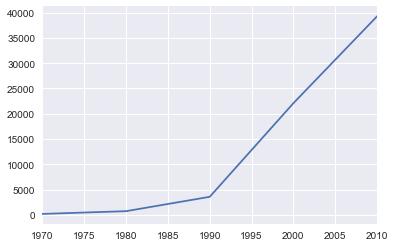

In [631]:
yr.value_counts().sort_index().plot()

In [256]:
year[year == 1999].value_counts()

1999    1101
Name: founded_at, dtype: int64

In [280]:
comps.status.value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

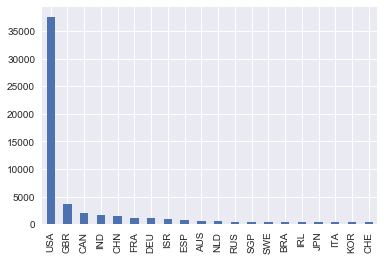

In [629]:
comps.country_code.value_counts().head(20).plot(kind='Bar')

In [304]:
usa = comps[comps.country_code == 'USA']
usa.head()

,permalink,name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,4,2011-01-01,2013-01-03,2015-11-09
8,/organization/1,One Inc.,http://whatis1.com,Mobile,1150050,operating,USA,CA,SF Bay Area,San Francisco,3,2011-08-01,2011-07-20,2014-02-05
10,/organization/1-4-all,1-4 All,NaN,Entertainment|Games|Software,-,operating,USA,NC,NC - Other,Connellys Springs,1,2013-04-21,2013-04-21,2013-04-21


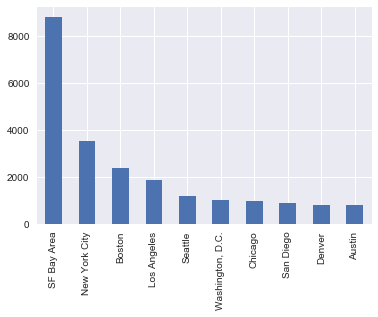

In [311]:
usa.region.value_counts().head(10).plot(kind='Bar')

In [316]:
usa.category_list.value_counts().head(20)

Software               2674
Biotechnology          2658
Health Care             691
Clean Technology        677
Curated Web             642
Health and Wellness     632
Mobile                  625
Hardware + Software     611
Enterprise Software     573
E-Commerce              538
Manufacturing           469
Advertising             413
Games                   397
Education               342
Semiconductors          316
Real Estate             306
Consulting              279
Security                264
Hospitality             256
Analytics               235
Name: category_list, dtype: int64

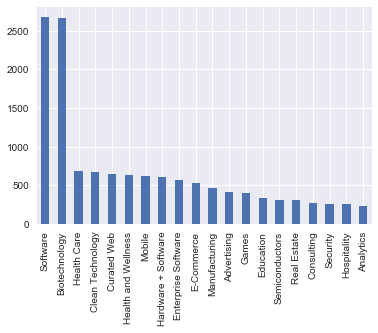

In [315]:
usa.category_list.value_counts().head(20).plot(kind='Bar')

In [362]:
usa.funding_rounds.value_counts().head(8).sum()
#fund = usa[['category_list','funding_rounds']].sort_values('funding_rounds', ascending=False)
#fund.head()

37320

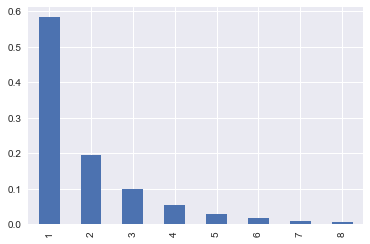

In [347]:
funds = usa.funding_rounds.value_counts('1').head(8)
funds.plot(kind='Bar')

In [372]:
acqui.company_category_list.value_counts().head(10)

Software               1459
Curated Web             580
Biotechnology           546
Enterprise Software     398
Mobile                  317
Games                   274
Advertising             268
E-Commerce              245
Hardware + Software     233
Semiconductors          211
Name: company_category_list, dtype: int64

In [373]:
acqui.acquirer_category_list.value_counts().head(10)

Software                                                                                 1233
Biotechnology                                                                             526
Hardware + Software                                                                       308
Enterprise Software                                                                       307
Curated Web                                                                               287
Advertising                                                                               285
Semiconductors                                                                            245
Mobile                                                                                    212
Communications Infrastructure|Data Center Infrastructure|Hardware|Networking|Software     193
E-Commerce                                                                                188
Name: acquirer_category_list, dtype: int64

In [442]:
#acqui.head()
acqui.company_region.value_counts().head(10)

SF Bay Area         2465
New York City        791
Boston               697
London               568
Los Angeles          442
Chicago              386
Washington, D.C.     342
Seattle              339
Denver               249
San Diego            237
Name: company_region, dtype: int64

In [443]:
#acqui.head()
acqui.acquirer_region.value_counts().head(10)

SF Bay Area         3322
New York City       1605
Boston               812
London               682
Los Angeles          620
Chicago              514
Seattle              486
Washington, D.C.     470
Atlanta              332
Newark               296
Name: acquirer_region, dtype: int64

In [452]:
acqui.head()

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,acquirer_permalink,acquirer_name,acquirer_category_list,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,acquired_at,acquired_month,price_amount,price_currency_code
0,/organization/003-ru,003.RU,Consumer Electronics|Electronics|Internet,RUS,48,Moscow,Moscow,/organization/media-saturn,Media Saturn,Enterprise Software|Media|Sales and Marketing,ESP,56,Barcelona,Barcelona,2012-07-23,2012-07,NaN,USD
1,/organization/0958572-b-c-ltd,0958572 B.C. Ltd.,NaN,NaN,NaN,NaN,NaN,/organization/atlas-intellectual-property-mana...,ATLAS Intellectual Property Management Co.,Finance|FinTech|Mobile|Telecommunications,USA,WA,Seattle,Seattle,2012-02-02,2012-02,9,USD
2,/organization/1-800-communications,1-800 Communications,NaN,USA,NY,Long Island,Hicksville,/organization/carsdirect-com,CarsDirect.com,E-Commerce,USA,CA,Los Angeles,El Segundo,2005-06-12,2005-06,NaN,USD
3,/organization/1-800-contacts,1-800 Contacts,Consumer Goods|Retail,USA,UT,Salt Lake City,Draper,/organization/thomas-h-lee-partners,Thomas H. Lee Partners,Business Development|Impact Investing|Investme...,USA,MA,Boston,Boston,2014-01-07,2014-01,NaN,USD
4,/organization/1-844-446-4460-pogo-customer-ser...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,NaN,NaN,NaN,NaN,/organization/pogo-customer-service-number-1-8...,Games Support +1-800-311-5934 Pogo Games techn...,NaN,USA,NY,New York City,Mamaroneck,2001-02-02,2001-02,NaN,USD


In [484]:
acqui.acquirer_name.value_counts().head(20)

Cisco                                    193
Google                                   176
Microsoft                                161
IBM (International Business Machines)    138
Yahoo!                                   118
Oracle Corporation                        94
Hewlett-Packard                           91
Intel                                     70
AOL                                       66
EMC                                       65
Apple                                     65
Facebook                                  57
Amazon                                    53
eBay                                      51
Twitter                                   47
Adobe Systems                             43
Nokia                                     41
Dell                                      38
Electronic Arts                           37
Riverside Company                         35
Name: acquirer_name, dtype: int64

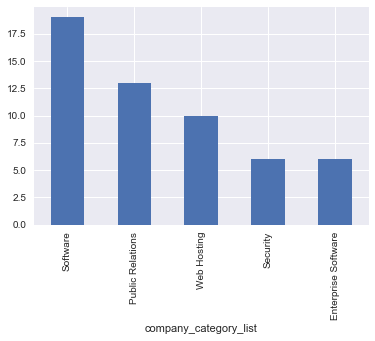

In [605]:
c = acqui[(acqui.acquirer_name == 'Cisco')]
g = c.groupby(['company_category_list']).size().sort_values(ascending=False)
g.nlargest(5).plot(kind='bar')

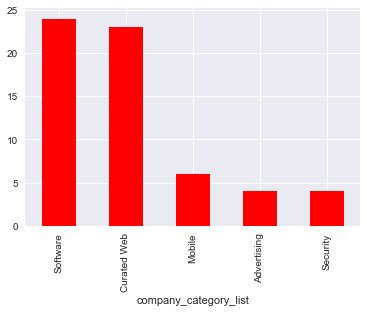

In [598]:
goog = acqui[(acqui.acquirer_name == 'Google')]
go = goog.groupby(['company_category_list']).size().sort_values(ascending=False)
go.nlargest(5).plot(kind='Bar', color ='r')

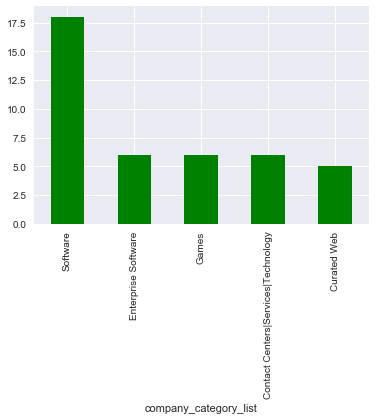

In [600]:
micro = acqui[(acqui.acquirer_name == 'Microsoft')]
mic = micro.groupby(['company_category_list']).size().sort_values(ascending=False)
mic.nlargest(5).plot(kind='Bar',color = 'g')

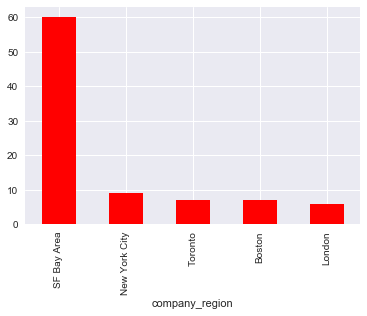

In [602]:
goog = acqui[(acqui.acquirer_name == 'Google')]
go = goog.groupby(['company_region']).size().sort_values(ascending=False)
go.nlargest(5).plot(kind='Bar',color = 'r')

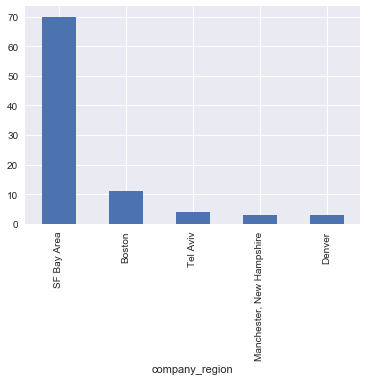

In [588]:
c = acqui[(acqui.acquirer_name == 'Cisco')]
g = c.groupby(['company_region']).size().sort_values(ascending=False)
g.nlargest(5).plot(kind='bar')

In [613]:
bio = acqui[acqui.company_category_list == 'Biotechnology']

In [622]:
bio.acquirer_region.value_counts().head(10)

Boston           47
SF Bay Area      33
Newark           32
New York City    29
Basel            20
San Diego        19
London           19
Anaheim          16
Philadelphia     16
Chicago          14
Name: acquirer_region, dtype: int64

In [623]:
bio.company_region.value_counts().head(10)

SF Bay Area         63
Boston              49
San Diego           32
Newark              21
Raleigh             18
Philadelphia        17
London              13
Washington, D.C.    13
Seattle             11
Anaheim              9
Name: company_region, dtype: int64

In [633]:
invest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168647 entries, 0 to 168646
Data columns (total 18 columns):
company_permalink          168647 non-null object
company_name               168646 non-null object
company_category_list      165015 non-null object
company_country_code       158126 non-null object
company_state_code         155216 non-null object
company_region             156162 non-null object
company_city               156164 non-null object
investor_permalink         168635 non-null object
investor_name              168635 non-null object
investor_country_code      137708 non-null object
investor_state_code        123908 non-null object
investor_region            125430 non-null object
investor_city              136483 non-null object
funding_round_permalink    168647 non-null object
funding_round_type         168647 non-null object
funding_round_code         81062 non-null object
funded_at                  168647 non-null object
raised_amount_usd          147028 non-nu

In [641]:
invest.funding_round_type.value_counts().head()

venture           104157
seed               43747
angel               6493
undisclosed         5608
private_equity      2779
Name: funding_round_type, dtype: int64

In [645]:
invest.investor_name.value_counts().head(10)

Sequoia Capital                     1033
Wayra                                936
500 Startups                         932
New Enterprise Associates            902
Intel Capital                        861
Y Combinator                         826
Accel                                779
Start-Up Chile                       727
Kleiner Perkins Caufield & Byers     727
SV Angel                             625
Name: investor_name, dtype: int64

In [660]:
invest.investor_region.value_counts().head(10)

SF Bay Area         37671
New York City       10786
Boston               8563
London               5464
Los Angeles          2729
Paris                2577
Washington, D.C.     2351
Chicago              2229
Seattle              2027
Tel Aviv             1984
Name: investor_region, dtype: int64

In [684]:
comps.status.value_counts()

operating    53034
closed        6238
acquired      5549
ipo           1547
Name: status, dtype: int64

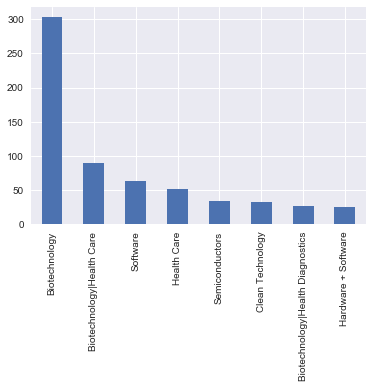

In [679]:
ipo = comps[comps.status == 'ipo']
ipo.category_list.value_counts().head(8).plot(kind='Bar')

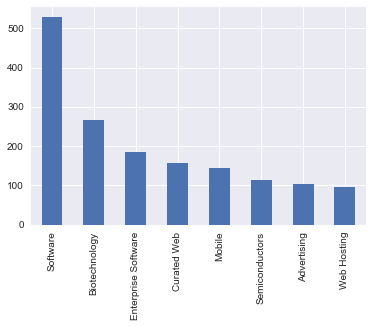

In [681]:
ipo = comps[comps.status == 'acquired']
ipo.category_list.value_counts().head(8).plot(kind='Bar')

In [700]:
invest.head()
#df_new = pd.merge(comps, invest, how='left', on=['company_name', 'company_category_list'])

,company_permalink,company_name,company_category_list,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,Curated Web,CHN,22,Beijing,Beijing,/organization/dt-capital-partners,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2e+06
1,/organization/004-technologies,004 Technologies,Software,USA,IL,"Springfield, Illinois",Champaign,/organization/venturecapital-de,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,Games,HKG,NaN,Hong Kong,Hong Kong,/organization/cyberport-hong-kong,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,4e+04
3,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/capital-one,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2e+07
4,/organization/0xdata,H2O.ai,Analytics,USA,CA,SF Bay Area,Mountain View,/organization/nexus-venture-partners,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3e+06


In [703]:
comps1 = comps.rename(columns={'permalink': 'company_permalink', 'name': 'company_name'})
comps1.head()

,company_permalink,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,/organization/-fame,#fame,http://livfame.com,Media,10000000,operating,IND,16,Mumbai,Mumbai,1,2015-01-05,2015-01-05,2015-01-05
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,700000,operating,USA,DE,DE - Other,Delaware City,2,2014-09-04,2014-03-01,2014-10-14
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,3406878,operating,NaN,NaN,NaN,NaN,1,2014-01-30,2014-01-30,2014-01-30
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,1,2007-01-01,2008-03-19,2008-03-19
4,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,1,2010-01-01,2014-07-24,2014-07-24


In [802]:
df_new = pd.merge(comps1, invest, how='inner', on=['company_name', 'company_permalink'])
df_new

,company_permalink,company_name,homepage_url,category_list,funding_total_usd,status,country_code,state_code,region,city,...,investor_name,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,2000000,operating,CHN,22,Beijing,Beijing,...,DT Capital Partners,CHN,23,Shanghai,Shanghai,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,2008-03-19,2e+06
1,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,-,operating,USA,IL,"Springfield, Illinois",Champaign,...,VCDE Venture Partners,DEU,5,Frankfurt,Frankfurt,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,2014-07-24,NaN
2,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,41250,operating,HKG,NaN,Hong Kong,Hong Kong,...,Cyberport Hong Kong,HKG,NaN,Hong Kong,Hong Kong,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,NaN,2014-07-01,4e+04
3,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Capital One,USA,VA,"Washington, D.C.",Mclean,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2e+07
4,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,NaN,2013-05-22,3e+06
5,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2e+07
6,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,2013-01-03,2e+06
7,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Nexus Venture Partners,USA,CA,SF Bay Area,Menlo Park,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,2014-07-19,9e+06
8,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Paxion Capital Partners,NaN,NaN,NaN,NaN,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2e+07
9,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,33600000,operating,USA,CA,SF Bay Area,Mountain View,...,Transamerica,USA,IA,Cedar Rapids,Cedar Rapids,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,2015-11-09,2e+07


In [800]:
df_new.status.value_counts()

operating    124164
acquired      26796
closed        11400
ipo            6286
Name: status, dtype: int64

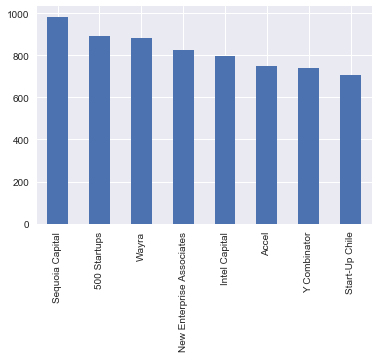

In [760]:
inv_ipo = df_new[(df_new.status == 'ipo')|(df_new.status == 'acquired')|(df_new.status == 'operating')]
inv_ipo.investor_name.value_counts().head(8).plot(kind='Bar')

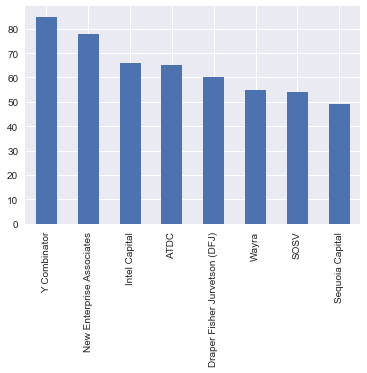

In [761]:
inv_close = df_new[df_new.status == 'closed']
inv_close.investor_name.value_counts().head(8).plot(kind='Bar')